# Perform hierarchical clustering on real-world data (shopping-data.csv).

In [21]:
#Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Reading data set
shop_data= pd.read_csv("shopping-data.csv")
x = shop_data.iloc[:, [0, 1, 2, 3]].values
shop_data.info()
shop_data[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [23]:
# Make a crosstab and name the count column
shopping_outcome = pd.crosstab(index=shop_data["Genre"], columns="count") 
shopping_outcome

col_0,count
Genre,
Female,112
Male,88


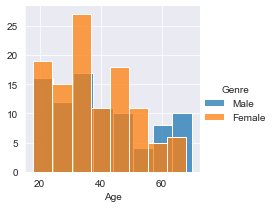

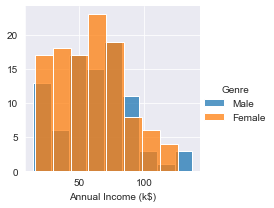

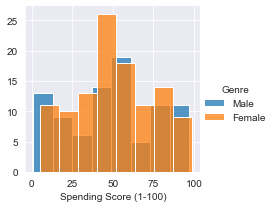

In [24]:
#Histograms of shopping-data attributes
sns.FacetGrid(shop_data,hue="Genre",height=3).map(sns.histplot,"Age").add_legend()
sns.FacetGrid(shop_data,hue="Genre",height=3).map(sns.histplot,"Annual Income (k$)").add_legend()
sns.FacetGrid(shop_data,hue="Genre",height=3).map(sns.histplot,"Spending Score (1-100)").add_legend()
plt.show()

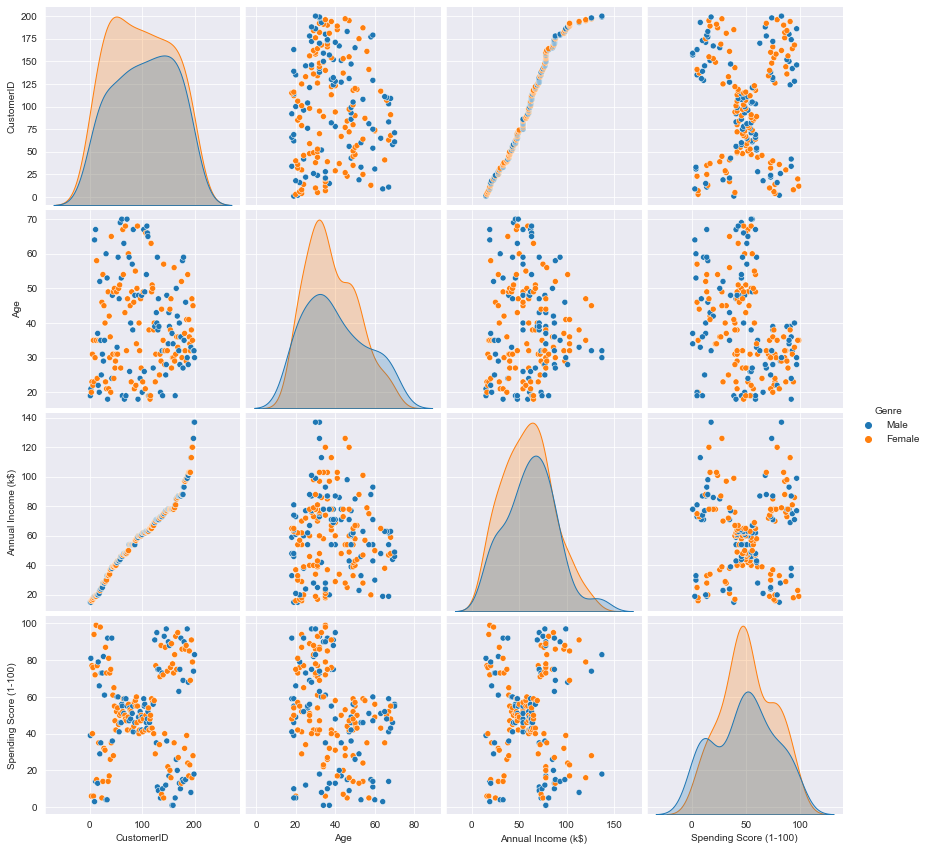

In [25]:
#Visualizing data distribution
#Scatter plot of features according to Genre
sns.set_style("darkgrid")
sns.pairplot(shop_data, hue="Genre", height=3);
plt.show()

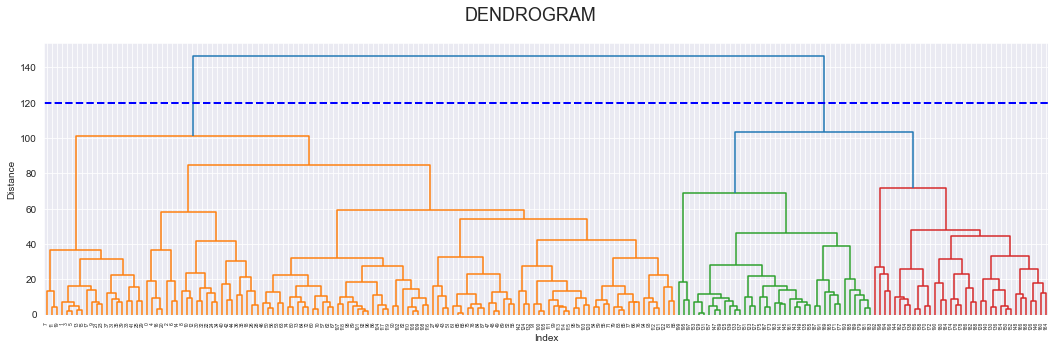

2


In [76]:
#Draw dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the distance between each data point using method="complete"

X = shop_data.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]
dist_sin = linkage(X, method="complete")
plt.figure(figsize=(18,5))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=18)

# Add horizontal line at a given distance
plt.axhline(y=120, c='blue', lw=2, linestyle='dashed')

plt.show()

def get_number_of_clusters(height, Z):
    nbr_of_leaves = Z.shape[0] + 1
    merge_heights = Z[:, 2]
    nbr_of_clusters  = nbr_of_leaves - np.digitize(height, merge_heights)
    return nbr_of_clusters
#Get number of clusters for a given distance
print(get_number_of_clusters(120, dist_sin))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


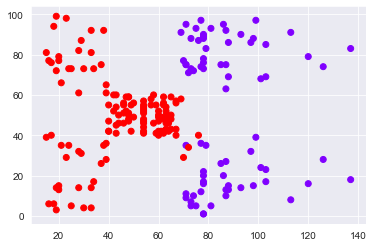

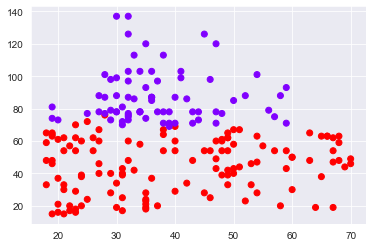

In [109]:
#Apply the HAC algorithm
#Number of clusters : 2
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                  linkage='complete')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters
data = X.iloc[:, 1:3].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()
#Plot Age, Annual Income (k$) and Spending Score (1-100)
data = X.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()


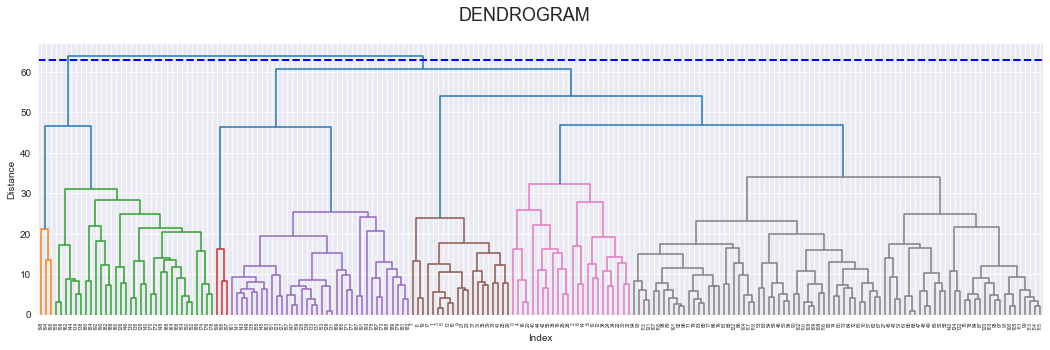

2


In [87]:
#Draw dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the distance between each data point using method="average"

X = shop_data.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]
dist_sin = linkage(X, method="average")
plt.figure(figsize=(18,5))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=18)

# Add horizontal line at a given distance
plt.axhline(y=63, c='blue', lw=2, linestyle='dashed')

plt.show()

#Get number of clusters for a given distance
print(get_number_of_clusters(63, dist_sin))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


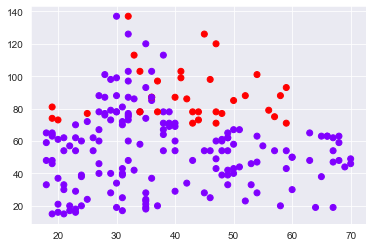

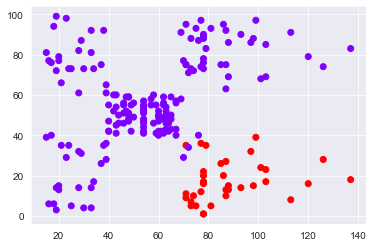

In [93]:
# applying the hierarchical clustering algorithm with 2 clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters

#Plot Age, Annual Income (k$) and Spending Score (1-100)
data = X.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

data = X.iloc[:, 1:3].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

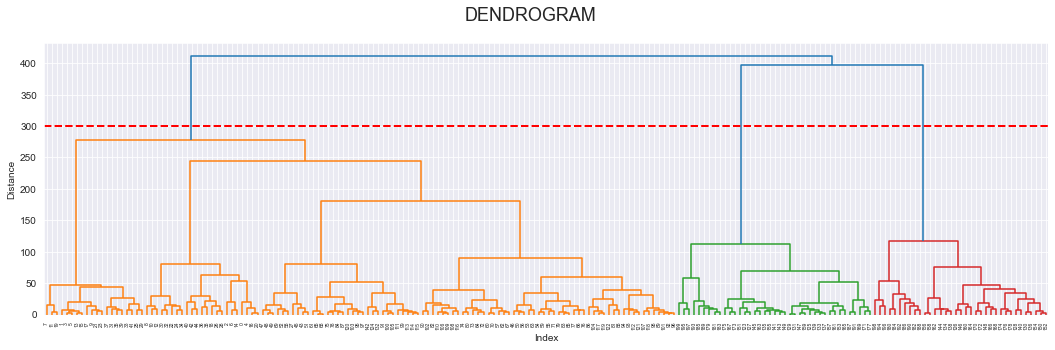

3


In [98]:
#Draw dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate the distance between each data point using method="ward"
X = shop_data.loc[:,["Age","Annual Income (k$)","Spending Score (1-100)"]]
dist_sin = linkage(X, method="ward")
plt.figure(figsize=(18,5))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=18)

# Add horizontal line at a given distance
plt.axhline(y=300, c='red', lw=2, linestyle='dashed')

plt.show()
#Get number of clusters for a given distance
print(get_number_of_clusters(300, dist_sin))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


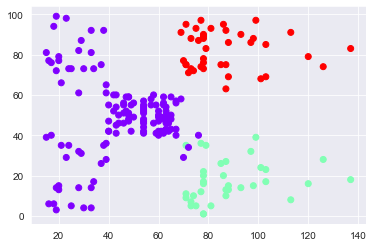

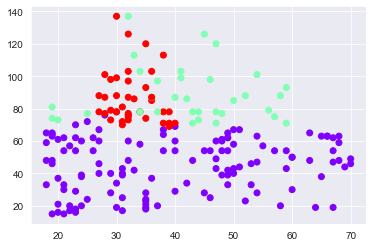

In [102]:
# applying the hierarchical clustering algorithm with 3 clusters
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters

#Plot Age, Annual Income (k$) and Spending Score (1-100)

data = X.iloc[:, 1:3].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()
data = X.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()


In [107]:
#Evaluation of hierarchical clustering

#Add hierarchical clustering result to data set
from scipy.cluster.hierarchy import fcluster
shopping_HAC = shopping.copy()

#fcluster : forms flat clusters from the hierarchical clustering 
#defined by the given linkage matrix
shopping_HAC['K=2'] = fcluster(dist_sin, 2, criterion='maxclust')
shopping_HAC['K=3'] = fcluster(dist_sin, 3, criterion='maxclust')

shopping_HAC.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),K=2,K=3
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,1
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,1
